C:\Users\Satyam Padhi\AppData\Local\Temp\ipykernel_9860\732557497.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 328110 entries, 3417900 to 3998844
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 328110 non-null  object
 1   Product                       328110 non-null  object
 2   Sub-product                   309519 non-null  object
 3   Issue                         328110 non-null  object
 4   Sub-issue                     270998 non-null  object
 5   Consumer complaint narrative  119182 non-null  object
 6   Company public response       152443 non-null  object
 7   Company                       328110 non-null  object
 8   State                         324535 non-null  object
 9   ZIP code                      325615 non-null  object
 10  Tags                          34144 non-null   object
 11  Consumer consent provided?    255767 non-null  object
 12  Submitted via                 328110 non-null  obje

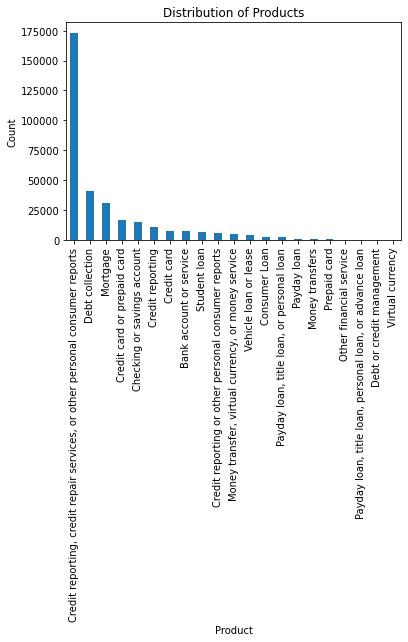

In [1]:
# Step 1: Explanatory Data Analysis and Feature Engineering
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('complaints.csv')
df=df.sample(frac=0.08)

# EDA
print(df.info())
print(df.describe())

# Visualize the data
df['Product'].value_counts().plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

# Feature Engineering (example: encoding categorical variables)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Product_Encoded'] = label_encoder.fit_transform(df['Product'])


In [ ]:
# Step 2: Text Pre-Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

def preprocess_text(text):
    if isinstance(text, str):  # Check if it's a string
        text = text.lower()
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        tokens = text.split()
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
        return ' '.join(tokens)
    else:
        return ''  # Handle missing or non-string values by returning an empty string

# Apply text pre-processing to the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\Satyam
[nltk_data]     Padhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 3: Selection of Multi-Classification Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X = df['Consumer complaint narrative']
y = df['Product_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

In [ ]:
# Step 4: Comparison of Model Performance
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
# Step 5: Model Evaluation (visualization of confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 6: Prediction
# Prepare new data for prediction and apply the same pre-processing steps
new_data = ["I have a complaint about my mortgage payment.", "I am unhappy with my credit card fees."]
new_data_preprocessed = [preprocess_text(text) for text in new_data]
new_data_tfidf = tfidf_vectorizer.transform(new_data_preprocessed)
predictions = rf_classifier.predict(new_data_tfidf)

# Map predictions back to product categories
predicted_categories = label_encoder.inverse_transform(predictions)
print("Predicted Categories:", predicted_categories)
